In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
frame = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)
frame.drop(index=frame[frame.Sub_metering_3.isnull()].index, inplace=True)
for c in frame.columns[2:]:
    frame[c]=frame[c].astype(float)

In [3]:
frame

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [4]:
features = ['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']
X = frame[features]
y = frame.Global_active_power

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred1 = linreg.predict(X_test)

In [7]:
ridgereg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgereg.fit(X_train,y_train)
y_pred2 = ridgereg.predict(X_test)

In [8]:
lassoreg = linear_model.LassoCV(cv=10, tol=0.1, random_state=0)
lassoreg.fit(X_train, y_train)
y_pred3 = lassoreg.predict(X_test)

In [9]:
print('linear:', metrics.mean_squared_error(y_test, y_pred1))
print('ridge:', metrics.mean_squared_error(y_test, y_pred2))
print('lasso:', metrics.mean_squared_error(y_test, y_pred3))

linear: 0.0016480882856601934
ridge: 0.0016480780762047047
lasso: 0.002184011313316692


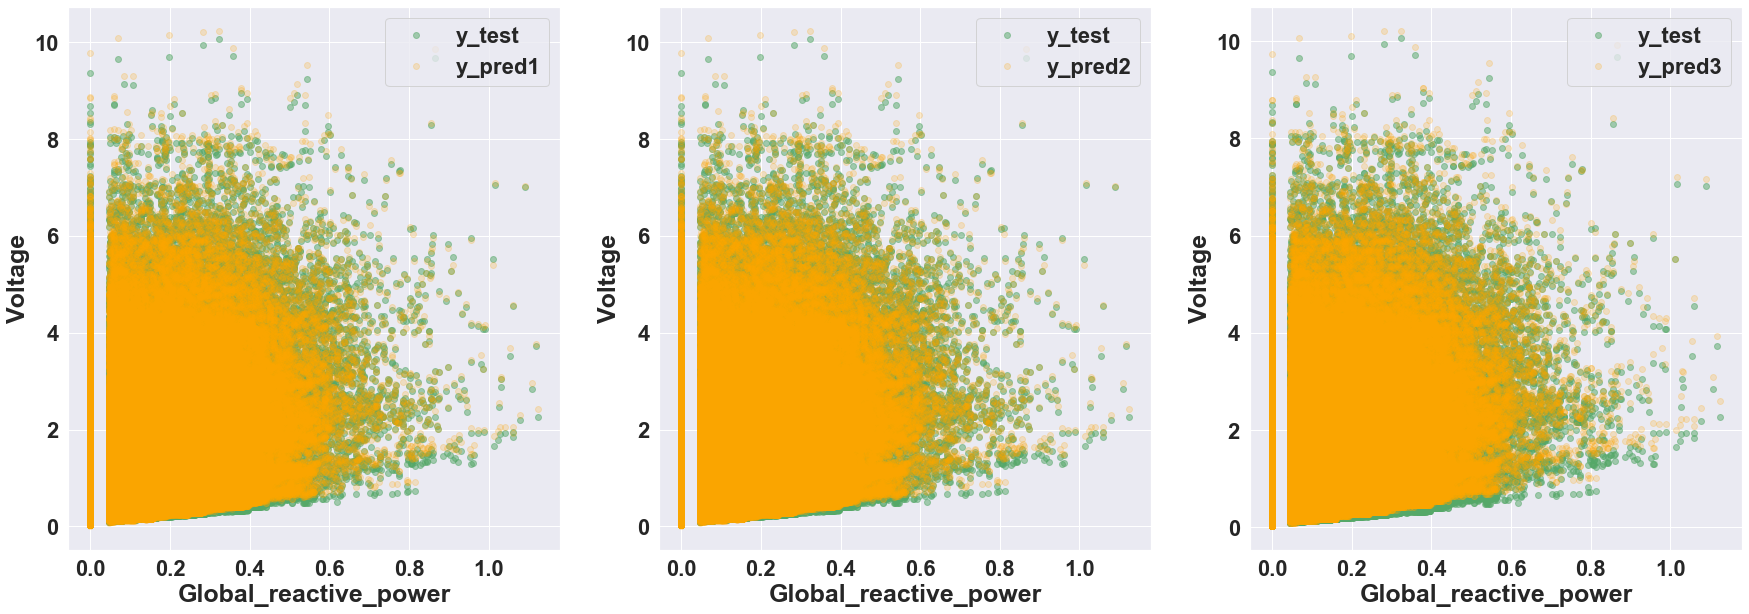

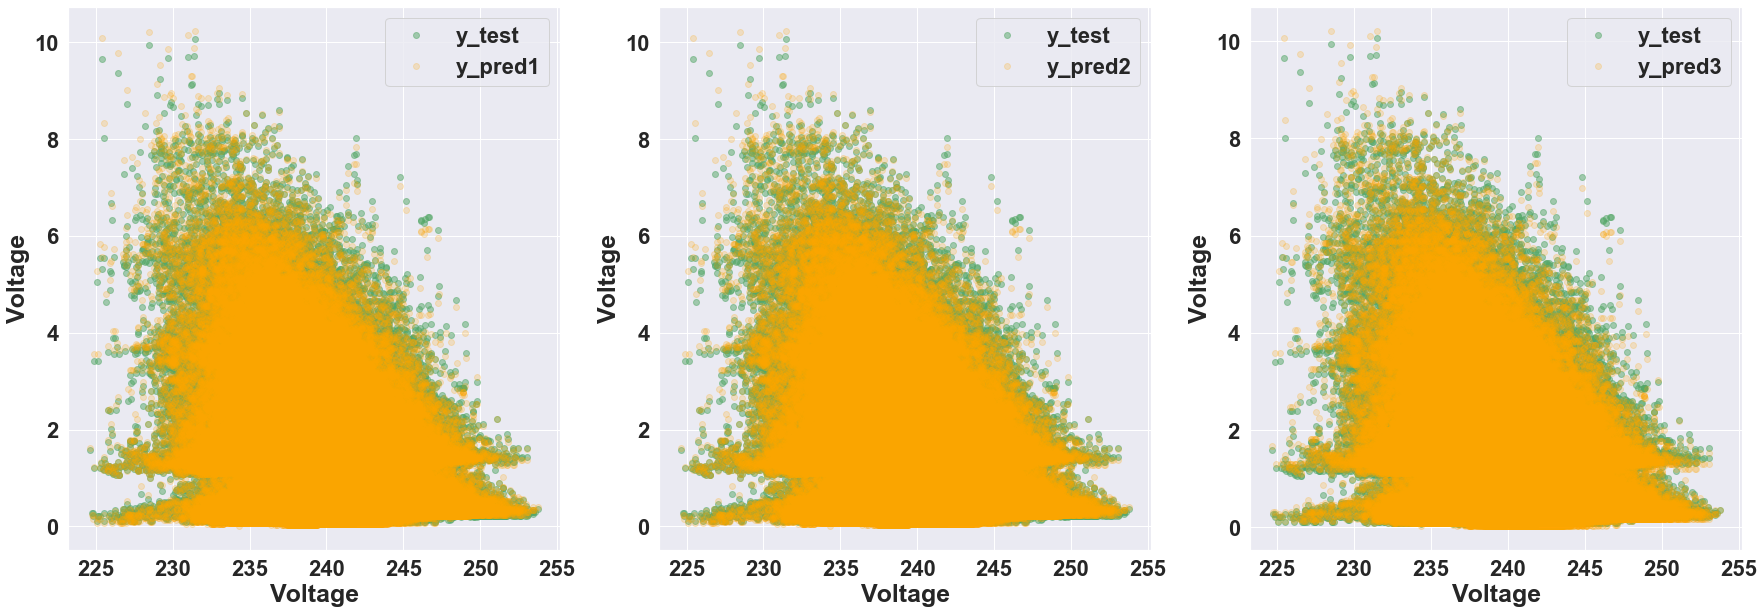

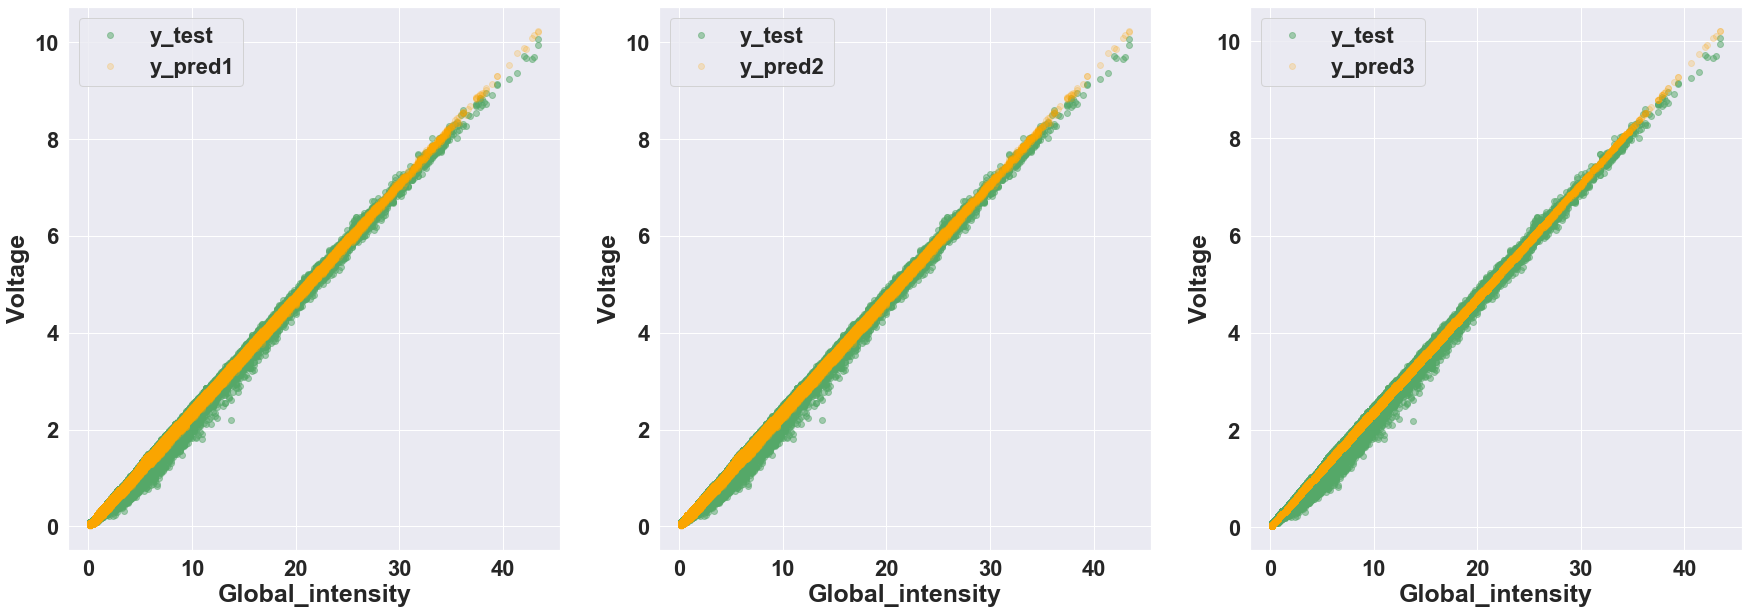

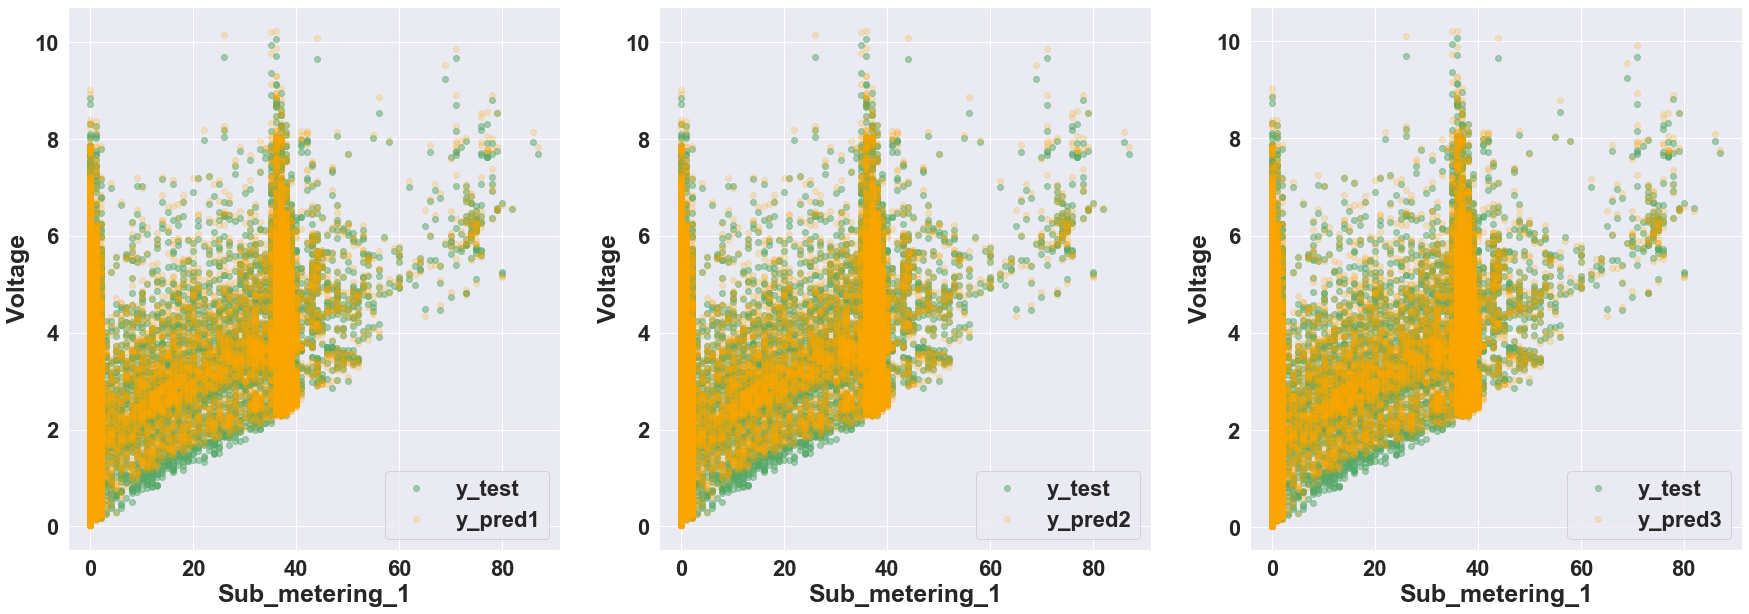

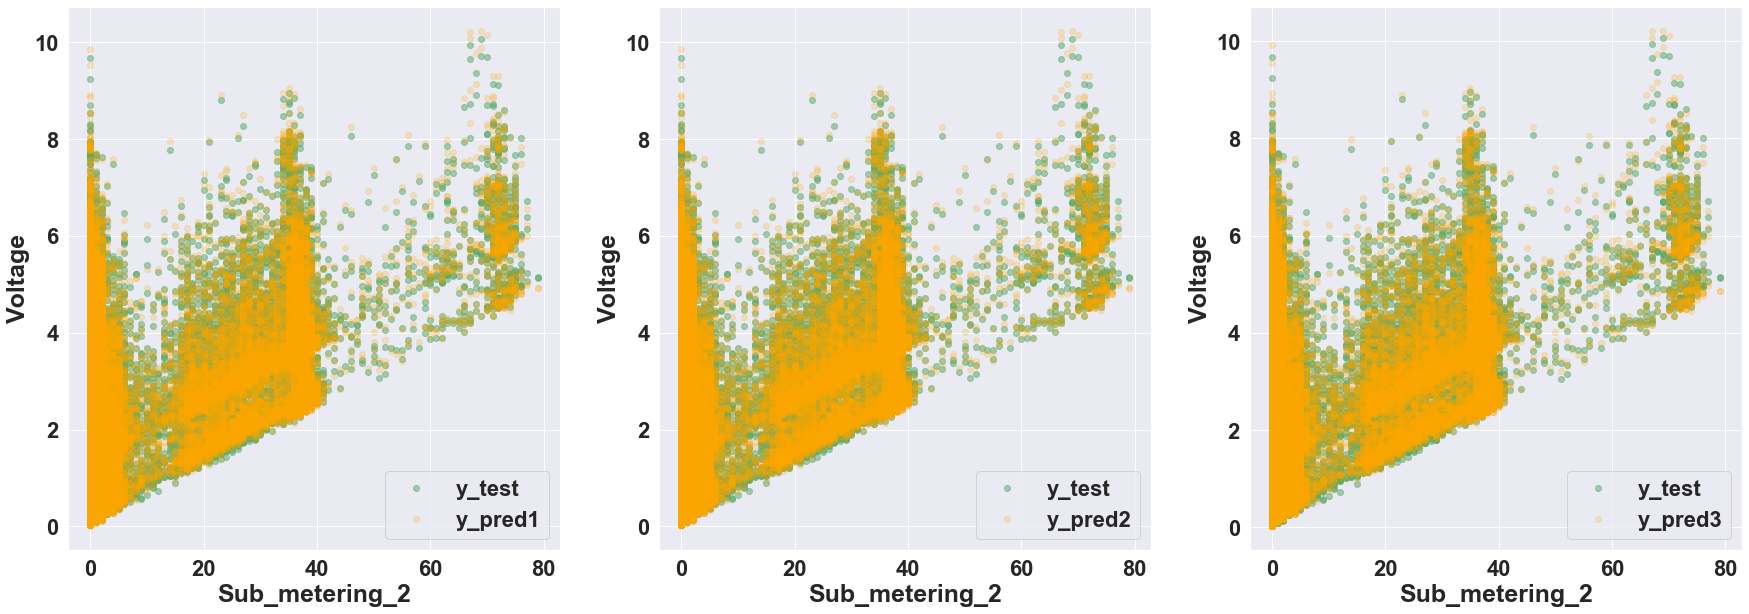

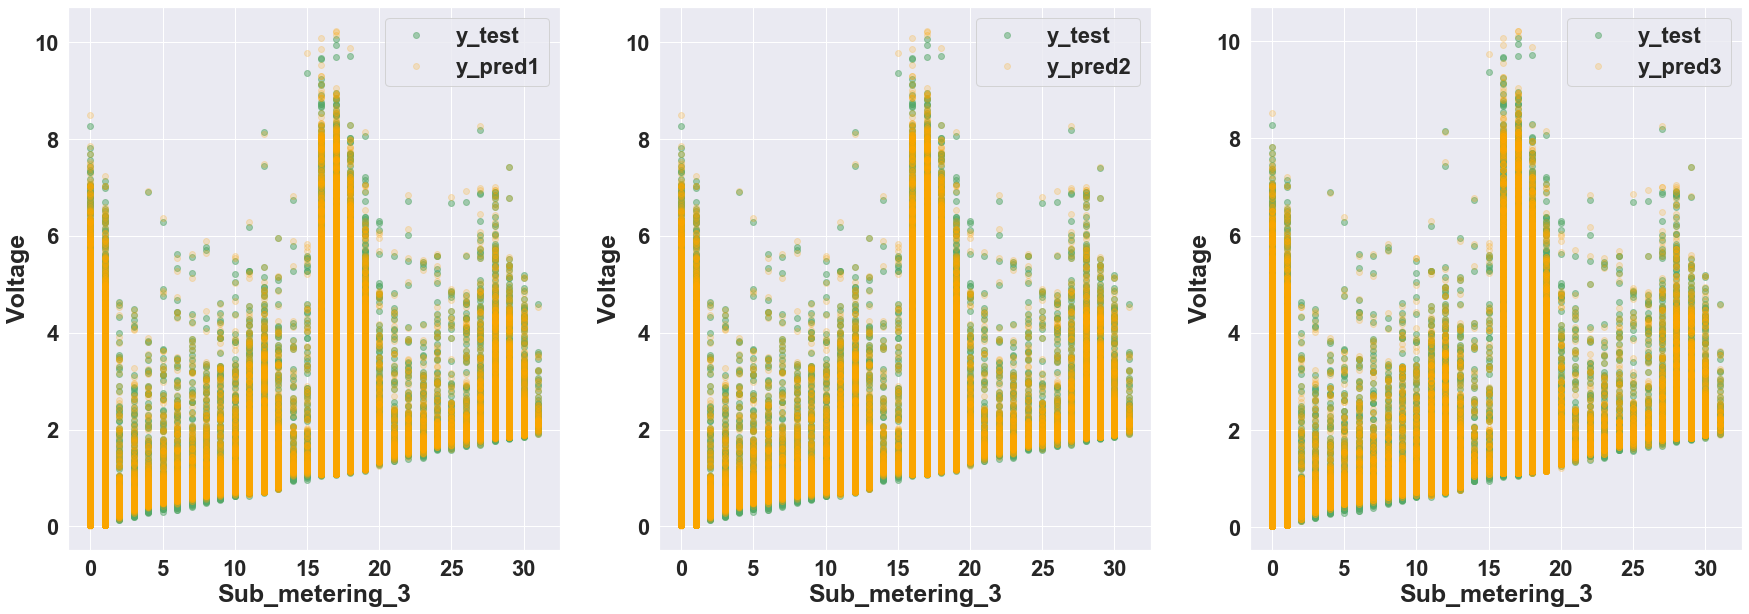

In [10]:
sns.set(font_scale=2)
font = {'weight' : 'bold',
        'size'   : 25}
plt.rc('font')#, **font)
for x_val in features:
    plt.rc('font', **font)
    plt.figure(figsize=(30,10))
    plt.subplot(131)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5)
    plt.plot(X_test[x_val], y_pred1, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred1'], loc=0)
    plt.subplot(132)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5 )
    plt.plot(X_test[x_val], y_pred2, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred2'], loc=0)
    plt.subplot(133)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5 )
    plt.plot(X_test[x_val], y_pred3, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred3'], loc=0)
    plt.show()

In [11]:
features = ['Sub_metering_1','Sub_metering_2','Sub_metering_3']
X = frame[features]
y = frame.Global_active_power
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred1 = linreg.predict(X_test)

In [13]:
ridgereg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgereg.fit(X_train,y_train)
y_pred2 = ridgereg.predict(X_test)

In [14]:
lassoreg = linear_model.LassoCV(cv=10, tol=0.1, random_state=0)
lassoreg.fit(X_train, y_train)
y_pred3 = lassoreg.predict(X_test)

In [15]:
print('linear:', metrics.mean_squared_error(y_test, y_pred1))
print('ridge:', metrics.mean_squared_error(y_test, y_pred2))
print('lasso:', metrics.mean_squared_error(y_test, y_pred3))

linear: 0.31366542662652863
ridge: 0.3136654241121849
lasso: 0.3136700328599687


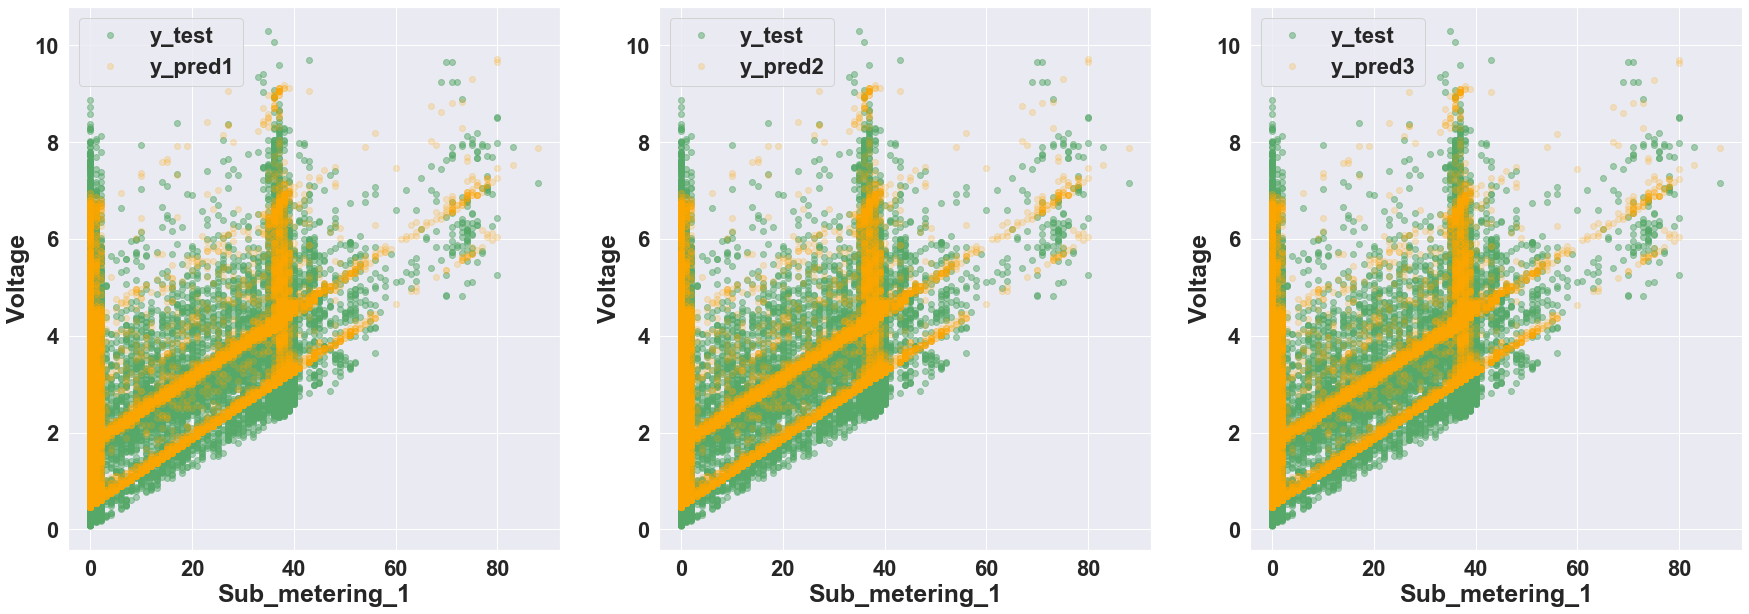

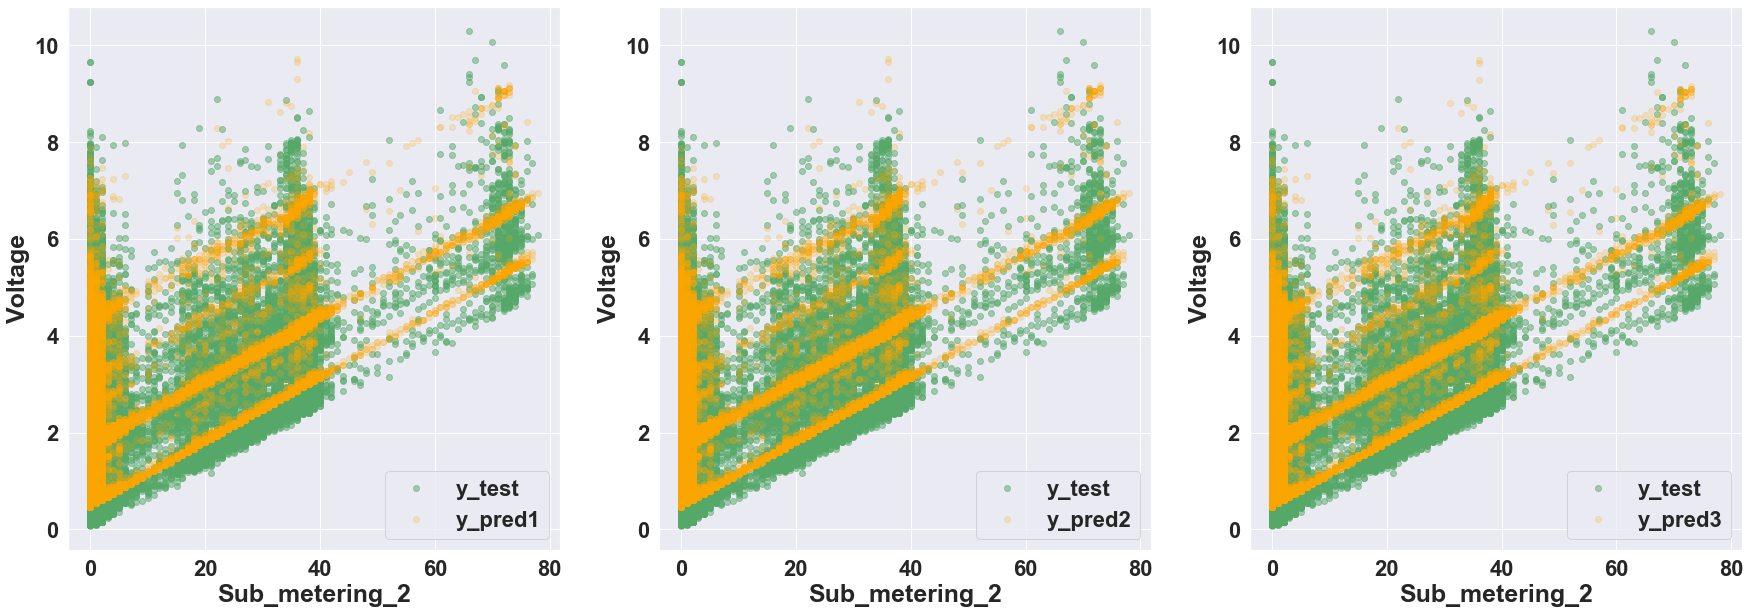

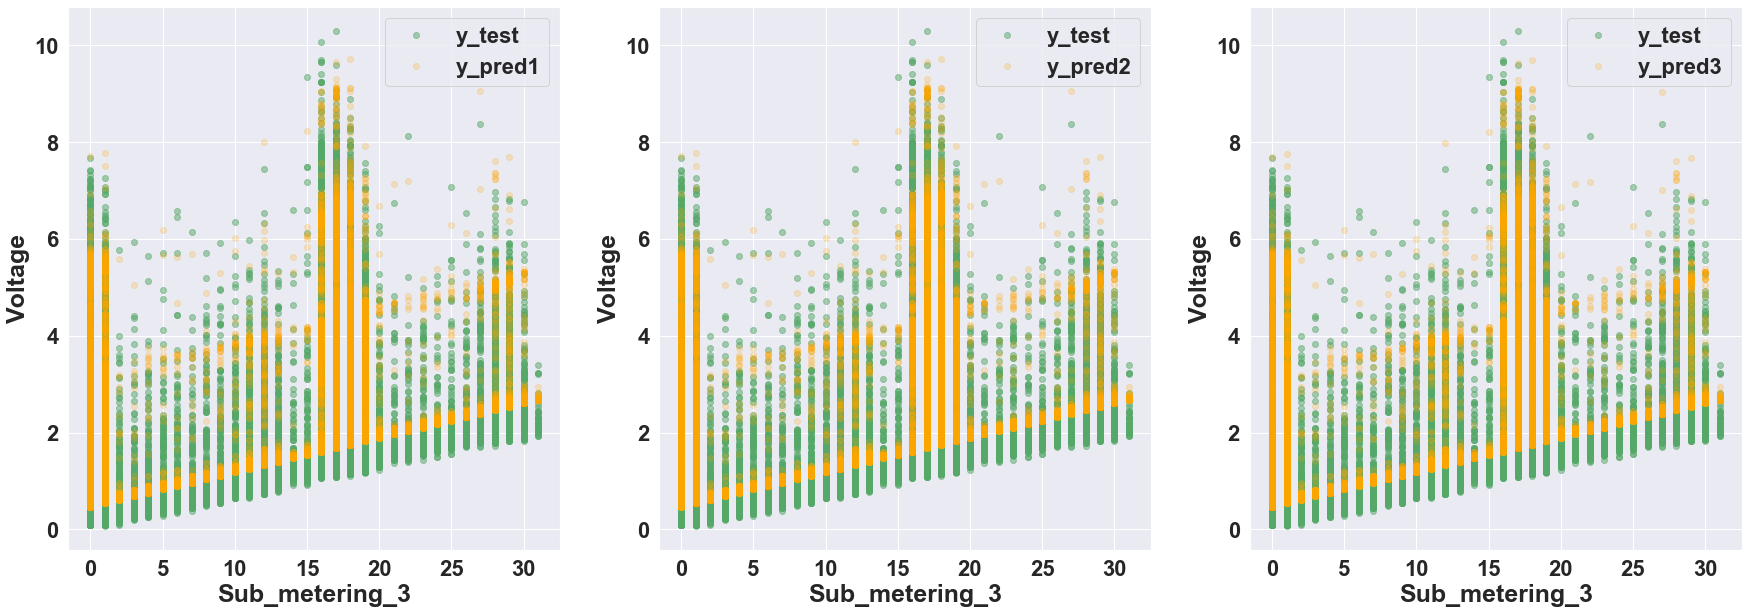

In [17]:
sns.set(font_scale=2)
font = {'weight' : 'bold',
        'size'   : 25}
plt.rc('font')#, **font)
for x_val in features:
    plt.rc('font', **font)
    plt.figure(figsize=(30,10))
    plt.subplot(131)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5)
    plt.plot(X_test[x_val], y_pred1, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred1'], loc=0)
    plt.subplot(132)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5 )
    plt.plot(X_test[x_val], y_pred2, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred2'], loc=0)
    plt.subplot(133)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5 )
    plt.plot(X_test[x_val], y_pred3, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred3'], loc=0)
    plt.show()

In [18]:
features = ['Global_reactive_power','Global_intensity']
X = frame[features]
y = frame.Global_active_power
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred1 = linreg.predict(X_test)

In [20]:
ridgereg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
ridgereg.fit(X_train,y_train)
y_pred2 = ridgereg.predict(X_test)

In [ ]:
lassoreg = linear_model.LassoCV(cv=10, tol=0.1, random_state=0)
lassoreg.fit(X_train, y_train)
y_pred3 = lassoreg.predict(X_test)

In [ ]:
print('linear:', metrics.mean_squared_error(y_test, y_pred1))
print('ridge:', metrics.mean_squared_error(y_test, y_pred2))
print('lasso:', metrics.mean_squared_error(y_test, y_pred3))

In [ ]:
sns.set(font_scale=2)
font = {'weight' : 'bold',
        'size'   : 25}
plt.rc('font')#, **font)
for x_val in features:
    plt.rc('font', **font)
    plt.figure(figsize=(30,10))
    plt.subplot(131)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5)
    plt.plot(X_test[x_val], y_pred1, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred1'], loc=0)
    plt.subplot(132)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5 )
    plt.plot(X_test[x_val], y_pred2, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred2'], loc=0)
    plt.subplot(133)
    plt.plot(X_test[x_val], y_test, 'go', alpha=0.5 )
    plt.plot(X_test[x_val], y_pred3, 'o', color='orange',  alpha=0.2)
    plt.xlabel(x_val, **font)
    plt.ylabel('Voltage', **font)
    plt.legend(['y_test', 'y_pred3'], loc=0)
    plt.show()